# CS 4372.501.F22-Assignment 1
## Noah Khan and Ian Lunt

## PREPROCESSING AND ATTRIBUTE ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
# load the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/noahk587/CS-4372-Assignment-1-Linear-Regression/main/student-mat.csv",sep= ";")

In [ ]:
# output the head of the dataset to get an overview
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# check for null data
pd.isnull(dataset)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
# examine the attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Here we want to see of the categorical variables, how many levels do they have, as binary variables can just becomee 0/1, but ones with multiple levels will have to have dummy variables created
dataset['school'].value_counts()

0    349
1     46
Name: school, dtype: int64

In [ ]:
dataset['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [ ]:
dataset['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [ ]:
dataset['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [ ]:
dataset['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [ ]:
dataset['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [ ]:
dataset['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [ ]:
dataset['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [ ]:
dataset['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [ ]:
dataset['schoolsup'].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [ ]:
dataset['famsup'].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [ ]:
dataset['paid'].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [ ]:
dataset['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [ ]:
dataset['nursery'].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

In [ ]:
dataset['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [ ]:
dataset['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [ ]:
dataset['romantic'].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

In [ ]:
# Here we factorize the binary data outputs
dataset['school'], _ = pd.factorize(dataset['school'])
dataset['sex'], _ = pd.factorize(dataset['sex'])
dataset['address'], _ = pd.factorize(dataset['address'])
dataset['famsize'], _ = pd.factorize(dataset['famsize'])
dataset['Pstatus'], _ = pd.factorize(dataset['Pstatus'])
dataset['schoolsup'], _ = pd.factorize(dataset['schoolsup'])
dataset['famsup'], _ = pd.factorize(dataset['famsup'])
dataset['paid'], _ = pd.factorize(dataset['paid'])
dataset['activities'], _ = pd.factorize(dataset['activities'])
dataset['nursery'], _ = pd.factorize(dataset['nursery'])
dataset['higher'], _ = pd.factorize(dataset['higher'])
dataset['internet'], _ = pd.factorize(dataset['internet'])
dataset['romantic'], _ = pd.factorize(dataset['romantic'])

In [ ]:
# Since these categorical variables are not binary, we instead create dummy variables for them
dataset.loc[dataset['Mjob'] == 'services', 'Mjob_services'] = 1
dataset.loc[dataset['Mjob'] != 'services', 'Mjob_services'] = 0

dataset.loc[dataset['Mjob'] == 'at_home', 'Mjob_at_home'] = 1
dataset.loc[dataset['Mjob'] != 'at_home', 'Mjob_at_home'] = 0

dataset.loc[dataset['Mjob'] == 'teacher', 'Mjob_teacher'] = 1
dataset.loc[dataset['Mjob'] != 'teacher', 'Mjob_teacher'] = 0

dataset.loc[dataset['Mjob'] == 'health', 'Mjob_health'] = 1
dataset.loc[dataset['Mjob'] != 'health', 'Mjob_health'] = 0


dataset.loc[dataset['Fjob'] == 'services', 'Fjob_services'] = 1
dataset.loc[dataset['Fjob'] != 'services', 'Fjob_services'] = 0

dataset.loc[dataset['Fjob'] == 'at_home', 'Fjob_at_home'] = 1
dataset.loc[dataset['Fjob'] != 'at_home', 'Fjob_at_home'] = 0

dataset.loc[dataset['Fjob'] == 'teacher', 'Fjob_teacher'] = 1
dataset.loc[dataset['Fjob'] != 'teacher', 'Fjob_teacher'] = 0

dataset.loc[dataset['Fjob'] == 'health', 'Fjob_health'] = 1
dataset.loc[dataset['Fjob'] != 'health', 'Fjob_health'] = 0

dataset.loc[dataset['reason'] == 'home', 'reason_home'] = 1
dataset.loc[dataset['reason'] != 'home', 'reason_home'] = 0

dataset.loc[dataset['reason'] == 'reputation', 'reason_reputation'] = 1
dataset.loc[dataset['reason'] != 'reputation', 'reason_reputation'] = 0

dataset.loc[dataset['reason'] == 'other', 'reason_other'] = 1
dataset.loc[dataset['reason'] != 'other', 'reason_other'] = 0

dataset.loc[dataset['guardian'] == 'father', 'guardian_father'] = 1
dataset.loc[dataset['guardian'] != 'father', 'guardian_father'] = 0

dataset.loc[dataset['guardian'] == 'mother', 'guardian_mother'] = 1
dataset.loc[dataset['guardian'] != 'mother', 'guardian_mother'] = 0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    int64  
 1   sex                395 non-null    int64  
 2   age                395 non-null    int64  
 3   address            395 non-null    int64  
 4   famsize            395 non-null    int64  
 5   Pstatus            395 non-null    int64  
 6   Medu               395 non-null    int64  
 7   Fedu               395 non-null    int64  
 8   Mjob               395 non-null    object 
 9   Fjob               395 non-null    object 
 10  reason             395 non-null    object 
 11  guardian           395 non-null    object 
 12  traveltime         395 non-null    int64  
 13  studytime          395 non-null    int64  
 14  failures           395 non-null    int64  
 15  schoolsup          395 non-null    int64  
 16  famsup             395 non

In [ ]:
cols = ['school',
        'sex',
        'age',
        'address',
        'famsize',
        'Pstatus',
        'Medu',
        'Fedu',
        'traveltime',
        'studytime',
        'failures',
        'schoolsup',
        'famsup',
        'paid',
        'activities',
        'nursery',
        'internet',
        'romantic',
        'famrel',
        'freetime',
        'goout',
        'Dalc',
        'Walc',
        'health',
        'absences',
        'Mjob_services',
        'Mjob_at_home',
        'Mjob_teacher',
        'Mjob_health',
        'Fjob_services', 
        'Fjob_at_home', 
        'Fjob_teacher', 
        'Fjob_health', 
        'reason_home', 
        'reason_reputation', 
        'reason_other', 
        'guardian_father', 
        'guardian_mother',
        'G1',
        'G2',
        'G3']

In [ ]:
dataset[cols].describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_teacher,Fjob_health,reason_home,reason_reputation,reason_other,guardian_father,guardian_mother,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.222785,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,0.073418,0.045570,0.275949,0.265823,0.091139,0.227848,0.691139,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.261152,0.208814,0.447558,0.442331,0.288172,0.419976,0.462610,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,19.000000,20.000000


In [ ]:
# standardize and normalize the dataset
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_scaled = pd.DataFrame(mm.fit_transform(dataset[cols]), columns = dataset[cols].columns)

In [ ]:
data_scaled.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_teacher,Fjob_health,reason_home,reason_reputation,reason_other,guardian_father,guardian_mother,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,0.242315,0.222785,0.288608,0.896203,0.687342,0.63038,0.149367,0.345148,...,0.073418,0.045570,0.275949,0.265823,0.091139,0.227848,0.691139,0.494304,0.563891,0.520759
std,0.321177,0.499926,0.182292,0.416643,0.453690,0.305384,0.273684,0.27205,0.232502,0.279747,...,0.261152,0.208814,0.447558,0.442331,0.288172,0.419976,0.462610,0.207450,0.197974,0.229072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857,0.000000,0.000000,1.000000,0.500000,0.50000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.312500,0.473684,0.400000
50%,0.000000,0.000000,0.285714,0.000000,0.000000,1.000000,0.750000,0.50000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.578947,0.550000
75%,0.000000,1.000000,0.428571,0.000000,1.000000,1.000000,1.000000,0.75000,0.333333,0.333333,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.625000,0.684211,0.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_scaled.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_teacher,Fjob_health,reason_home,reason_reputation,reason_other,guardian_father,guardian_mother,G1,G2,G3
school,1.000000,-0.012286,0.377610,0.279797,0.064866,0.045923,-0.133333,-0.079807,0.242308,-0.090681,...,-0.041674,-0.079329,-0.029905,-0.129128,0.131836,0.028582,-0.064783,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.059722,-0.306268,...,0.044147,-0.061306,0.049883,-0.111434,0.016859,0.053098,-0.013642,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,0.146722,0.037847,0.029598,-0.163658,-0.163438,0.070641,-0.004140,...,-0.069993,-0.109842,0.018283,-0.031932,0.027172,-0.112046,-0.133558,-0.064081,-0.143474,-0.161579
address,0.279797,0.028504,0.146722,1.000000,-0.072472,0.042572,-0.138804,-0.072178,0.328096,0.020912,...,-0.010748,-0.058641,-0.153580,0.077227,0.041850,-0.073259,0.081376,-0.069704,-0.126037,-0.105756
famsize,0.064866,0.089862,0.037847,-0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.063493,-0.073595,...,-0.072183,0.021568,-0.005728,-0.003842,-0.026982,-0.012983,0.026727,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,0.042572,-0.149612,1.000000,-0.123565,-0.088730,0.028265,0.024294,...,-0.063327,-0.045041,-0.031310,-0.001903,0.021247,0.105710,-0.065813,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,-0.138804,-0.043068,-0.123565,1.000000,0.623455,-0.171639,0.064944,...,0.259836,0.083398,-0.008708,0.106487,0.008229,-0.046609,0.112375,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,-0.072178,-0.058879,-0.088730,0.623455,1.000000,-0.158194,-0.009175,...,0.347203,0.163216,-0.009618,0.048724,-0.014364,0.111422,-0.047265,0.190270,0.164893,0.152457
traveltime,0.242308,0.059722,0.070641,0.328096,0.063493,0.028265,-0.171639,-0.158194,1.000000,-0.100909,...,0.014004,-0.088277,-0.080027,-0.033322,-0.001662,0.031806,-0.057669,-0.093040,-0.153198,-0.117142
studytime,-0.090681,-0.306268,-0.004140,0.020912,-0.073595,0.024294,0.064944,-0.009175,-0.100909,1.000000,...,-0.058225,0.121107,-0.039620,0.193342,-0.107842,0.005834,-0.024031,0.160612,0.135880,0.097820


In [ ]:
# we wanted to narrow in on just what values are correlated
data_scaled.corr()['G3']

school              -0.045017
sex                  0.103456
age                 -0.161579
address             -0.105756
famsize              0.081407
Pstatus             -0.058009
Medu                 0.217147
Fedu                 0.152457
traveltime          -0.117142
studytime            0.097820
failures            -0.360415
schoolsup            0.082788
famsup              -0.039157
paid                 0.101996
activities           0.016100
nursery             -0.051568
internet             0.098483
romantic            -0.129970
famrel               0.051363
freetime             0.011307
goout               -0.132791
Dalc                -0.054660
Walc                -0.051939
health              -0.061335
absences             0.034247
Mjob_services        0.078429
Mjob_at_home        -0.115634
Mjob_teacher         0.057712
Mjob_health          0.116158
Fjob_services       -0.016108
Fjob_at_home        -0.013385
Fjob_teacher         0.095374
Fjob_health          0.057111
reason_hom

In [ ]:
# since there are so many variables, we wanted to just make plots of non binary categorical and qualitative variables, and even then there was too many for one pair plot
# so we split it into two separate groups
noncatcols1 = [
        'age',
        'Medu',
        'Fedu',
        'traveltime',
        'studytime',
        'failures',
        'goout',
        'G3']

noncatcols2 = [
        'famrel',
        'freetime',
        'Dalc',
        'Walc',
        'health',
        'absences',
      'G1',
        'G2',
        'G3']

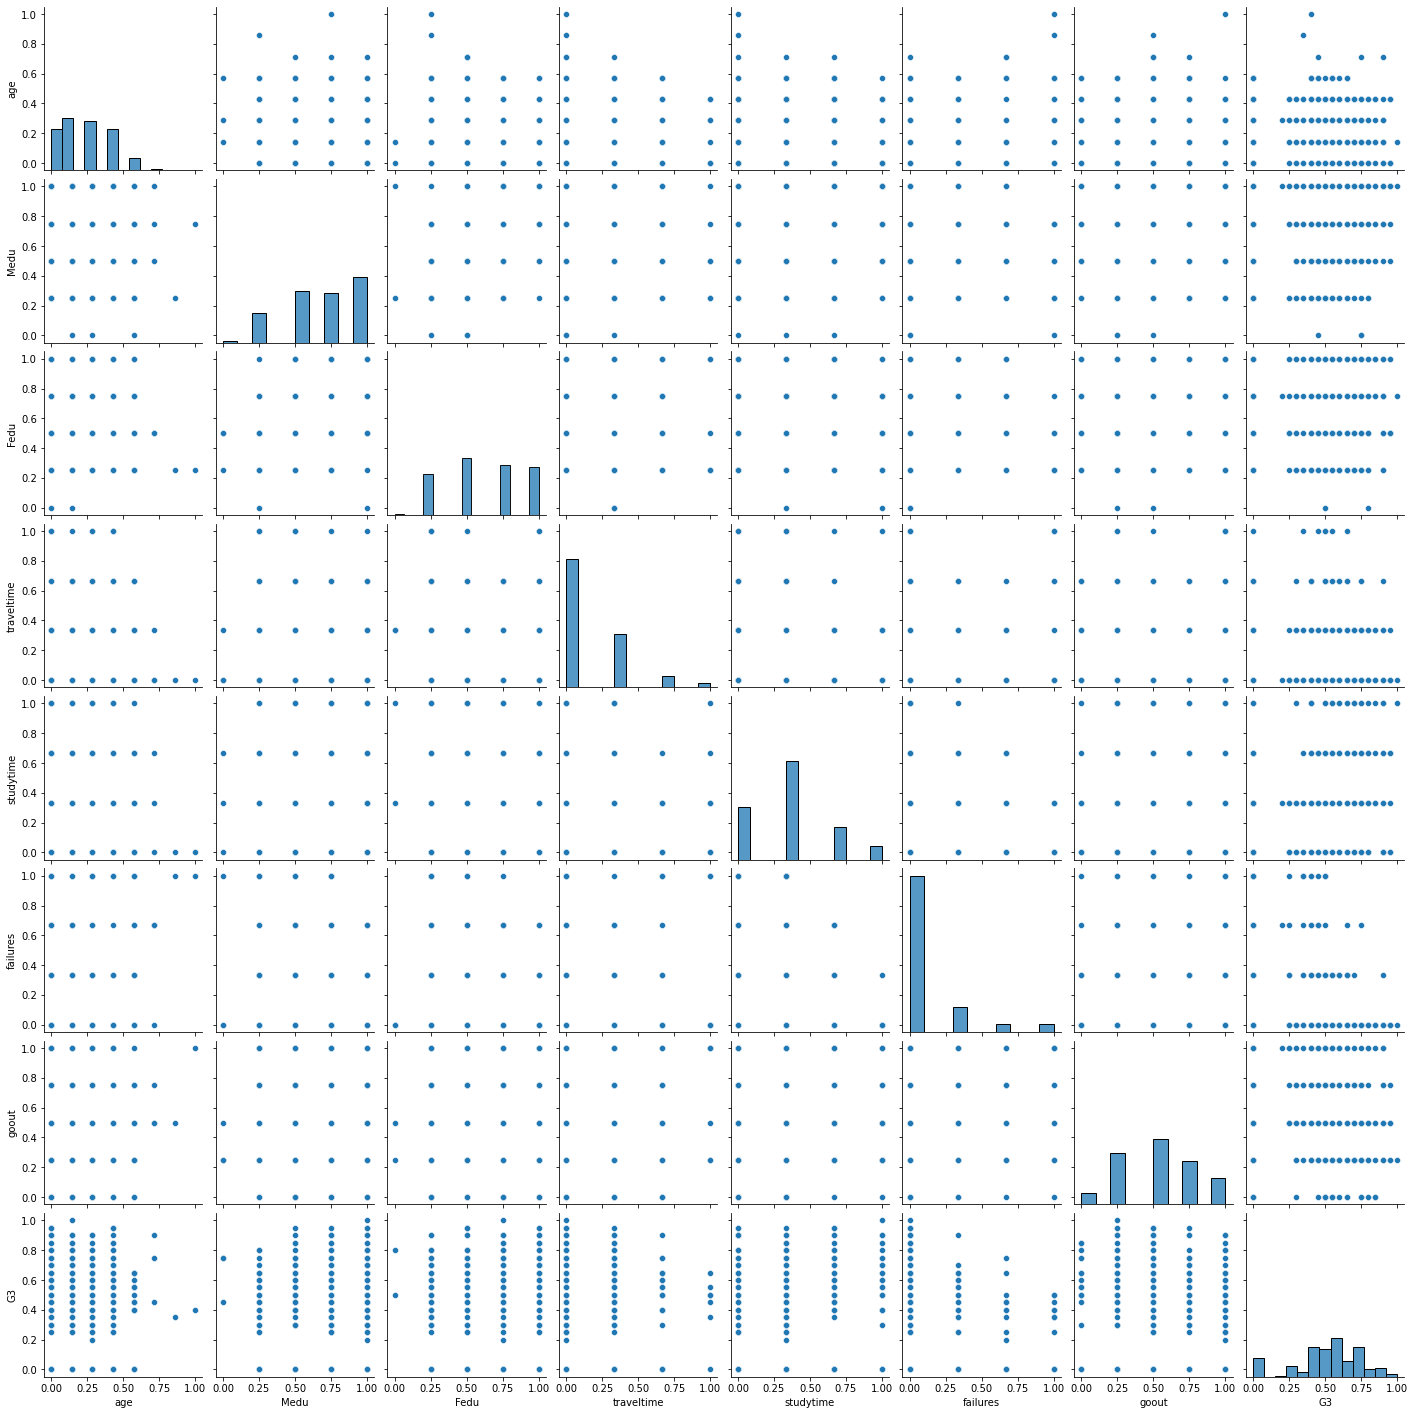

In [ ]:
sns.pairplot(data_scaled[noncatcols1])

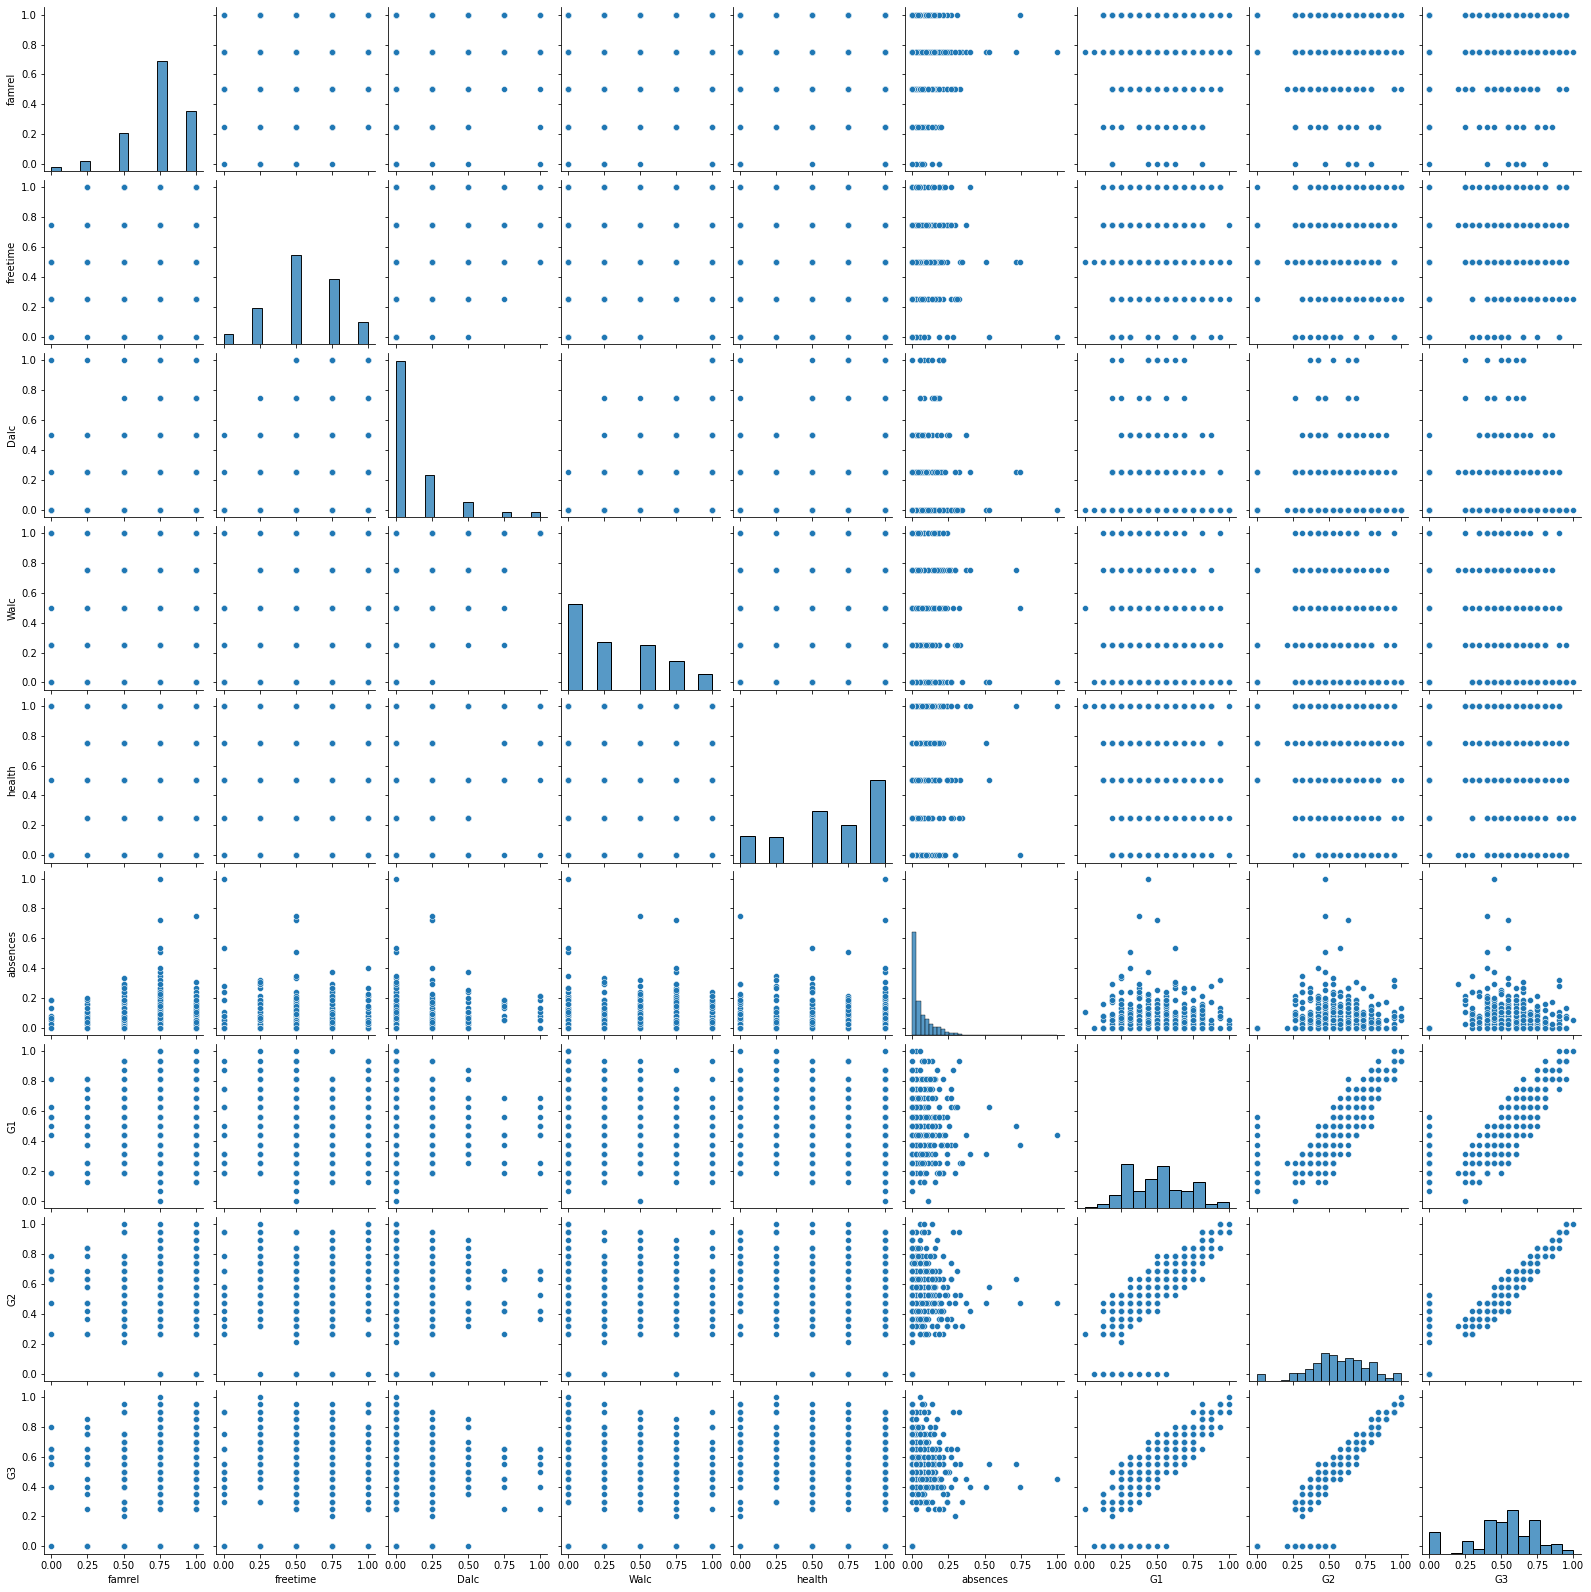

In [ ]:
sns.pairplot(data_scaled[noncatcols2])

In [ ]:
# we went with these because their corr with G3 is over 0.1
X = data_scaled[["sex","age","address","Medu","Fedu","traveltime","failures","paid","romantic",'goout',"G1","G2"]]

In [ ]:
Y = data_scaled['G3']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


## OLS MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lr.coef_ # coeficents 

array([ 0.00524211, -0.03239782, -0.00683094,  0.03150868, -0.03355762,
        0.03060876, -0.03319118,  0.00476483, -0.01357144,  0.01337065,
        0.09966531,  0.92084049])

In [ ]:
lr.intercept_ # the intercept

-0.04306374336354368

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)
 
model = smRegression.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     146.7
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          2.00e-118
Time:                        20:19:00   Log-Likelihood:                 320.71
No. Observations:                 316   AIC:                            -615.4
Df Residuals:                     303   BIC:                            -566.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0431      0.026     -1.664      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## SGD MODEL

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# trying lots of different hyper paramters
sgd1 = SGDRegressor(random_state=5, max_iter=10000, alpha=0.1)

sgd2 = SGDRegressor(random_state=5, max_iter=10000, alpha=0.05)

sgd3 = SGDRegressor(random_state=5, max_iter=10000, alpha=0.0)

sgd4 = SGDRegressor(random_state=5, max_iter=100000, alpha=0.0)

# also tried alpha = 0.05, but it would not converge
sgd5 = SGDRegressor(random_state=5, max_iter=10000, alpha=0.1,learning_rate = 'optimal')

sgd6 = SGDRegressor(random_state=5, max_iter=10000, alpha=0.2,learning_rate = 'optimal')

sgd7 = SGDRegressor(random_state=5, max_iter=10000, alpha=0.1,learning_rate = 'constant')

sgd8 = SGDRegressor(random_state=5, max_iter=10000, alpha=0.0,learning_rate = 'constant')

sgd9= SGDRegressor(random_state=5, max_iter=10000, alpha=0.0,learning_rate = 'constant')

In [ ]:
sgd1.fit(X_train, Y_train)

sgd2.fit(X_train, Y_train)

sgd3.fit(X_train, Y_train)

sgd4.fit(X_train, Y_train)

sgd5.fit(X_train, Y_train)

sgd6.fit(X_train, Y_train)

sgd7.fit(X_train, Y_train)

sgd8.fit(X_train, Y_train)

sgd9.fit(X_train[["G1","G2"]], Y_train)

SGDRegressor(alpha=0.0, learning_rate='constant', max_iter=10000,
             random_state=5)

In [144]:
#creating a table for all of the error and r squared
sgd_df = pd.DataFrame({'Test Mean Absolute Error': pd.Series(dtype='float'),
                   'Train Mean Absolute Error': pd.Series(dtype='float'),
                   'Test R-squared': pd.Series(dtype='float'),
                   'Train R-squared': pd.Series(dtype='float')})

In [146]:
sgd_df['Train Mean Absolute Error'] = [mean_absolute_error(Y_train, sgd1.predict(X_train)),
                                       mean_absolute_error(Y_train, sgd2.predict(X_train)), 
                                       mean_absolute_error(Y_train, sgd3.predict(X_train)),
                                       mean_absolute_error(Y_train, sgd4.predict(X_train)),
                                       mean_absolute_error(Y_train, sgd5.predict(X_train)),
                                       mean_absolute_error(Y_train, sgd6.predict(X_train)),
                                       mean_absolute_error(Y_train, sgd7.predict(X_train)),
                                       mean_absolute_error(Y_train, sgd8.predict(X_train)),
                                       mean_absolute_error(Y_train, sgd9.predict(X_train[['G1','G2']]))]

In [147]:
sgd_df['Test Mean Absolute Error'] = [mean_absolute_error(Y_test, sgd1.predict(X_test)),
                                       mean_absolute_error(Y_test, sgd2.predict(X_test)), 
                                       mean_absolute_error(Y_test, sgd3.predict(X_test)),
                                       mean_absolute_error(Y_test, sgd4.predict(X_test)),
                                       mean_absolute_error(Y_test, sgd5.predict(X_test)),
                                       mean_absolute_error(Y_test, sgd6.predict(X_test)),
                                       mean_absolute_error(Y_test, sgd7.predict(X_test)),
                                       mean_absolute_error(Y_test, sgd8.predict(X_test)),
                                       mean_absolute_error(Y_test, sgd9.predict(X_test[['G1','G2']]))]

In [149]:
sgd_df['Train R-squared'] = [r2_score(Y_train, sgd1.predict(X_train)),
                                       r2_score(Y_train, sgd2.predict(X_train)), 
                                       r2_score(Y_train, sgd3.predict(X_train)),
                                       r2_score(Y_train, sgd4.predict(X_train)),
                                       r2_score(Y_train, sgd5.predict(X_train)),
                                       r2_score(Y_train, sgd6.predict(X_train)),
                                       r2_score(Y_train, sgd7.predict(X_train)),
                                       r2_score(Y_train, sgd8.predict(X_train)),
                                       r2_score(Y_train, sgd9.predict(X_train[['G1','G2']]))]

In [148]:
sgd_df['Test R-squared'] = [r2_score(Y_test, sgd1.predict(X_test)),
                                       r2_score(Y_test, sgd2.predict(X_test)), 
                                       r2_score(Y_test, sgd3.predict(X_test)),
                                       r2_score(Y_test, sgd4.predict(X_test)),
                                       r2_score(Y_test, sgd5.predict(X_test)),
                                       r2_score(Y_test, sgd6.predict(X_test)),
                                       r2_score(Y_test, sgd7.predict(X_test)),
                                       r2_score(Y_test, sgd8.predict(X_test)),
                                       r2_score(Y_test, sgd9.predict(X_test[['G1','G2']]))]

In [158]:
sgd_df.set_axis(['SGD1','SGD2','SGD3','SGD4','SGD5','SGD6','SGD7','SGD8','SGD9'],0)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_axis except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Test Mean Absolute Error,Train Mean Absolute Error,Test R-squared,Train R-squared
SGD1,0.126129,0.122116,0.389207,0.491326
SGD2,0.121197,0.115742,0.425140,0.536995
SGD3,0.117197,0.110506,0.451036,0.571889
SGD4,0.117197,0.110506,0.451036,0.571889
SGD5,0.125561,0.121498,0.478365,0.538884
SGD6,0.130202,0.126912,0.314319,0.424485
SGD7,0.108116,0.102204,0.474585,0.604331
SGD8,0.075826,0.064000,0.686671,0.808289
SGD9,0.074594,0.064420,0.685672,0.795691
